In [510]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 80)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [511]:
data = pd.read_csv('day.csv', parse_dates=['dteday'])

In [512]:
data.shape

(730, 16)

Checking for `NULL` values in the dataset 

In [513]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [514]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Renaming the columns into meaningful name

In [515]:
data.rename(columns={'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'yr':'year'},inplace=True)

In [516]:
data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

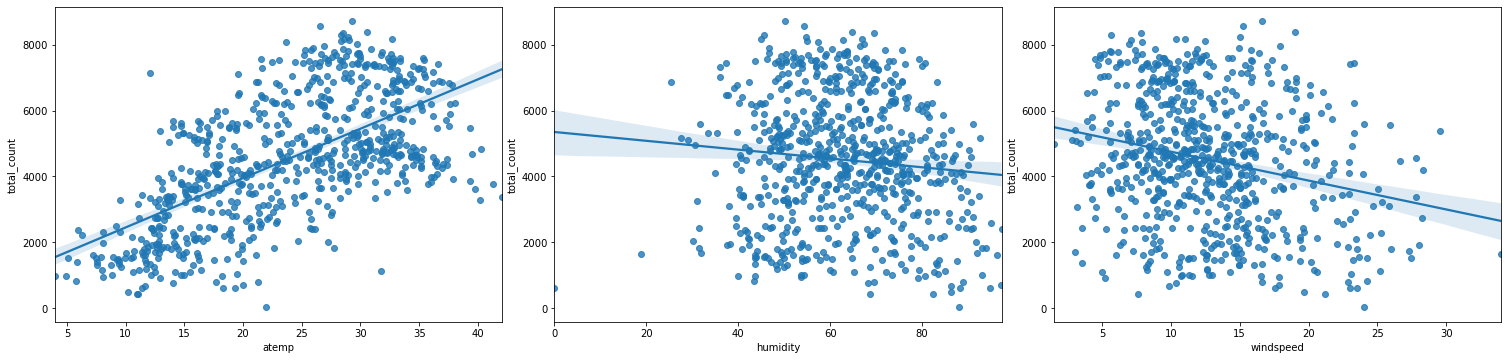

In [517]:

plt.figure(figsize = (21, 5))

continuous_cols = ['atemp', 'humidity', 'windspeed']
for i in enumerate(continuous_cols):
    plt.subplot(1, 3, i[0]+1)
    plt.tight_layout(pad=0.5)
    sns.regplot(x=i[1], y='total_count', data=data)

The above plots shows the correlation between atemp and count is the most

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            730 non-null    int64         
 1   dteday             730 non-null    datetime64[ns]
 2   season             730 non-null    int64         
 3   year               730 non-null    int64         
 4   month              730 non-null    int64         
 5   is_holiday         730 non-null    int64         
 6   weekday            730 non-null    int64         
 7   is_workingday      730 non-null    int64         
 8   weather_condition  730 non-null    int64         
 9   temp               730 non-null    float64       
 10  atemp              730 non-null    float64       
 11  humidity           730 non-null    float64       
 12  windspeed          730 non-null    float64       
 13  casual             730 non-null    int64         
 14  registered

From the data info() we can see that the features are either of these 3 data types,  `dates` `integers` and `floats`

Now remove the redundant features below and the reason to drop them.

`instant`- This is just a index for each observation.

`dteday` - This represnt the date on which the observation is recorded. But it can be deduced using other featrues, ie, year, mont and weekday.

`temp` - It is the actual temperature of a particular day. We have `atemp` column which also tells about the feels-like temperature of that day.Both are highly correlated, as shown in the plot above. So I will keep `atemp` and drop `temp`.

Also drop `casual` and `registered` feature as these are kind of target variable because cnt = casual + registered.

In [519]:
data.drop(columns=['instant', 'dteday', 'temp', 'casual', 'registered'], inplace=True)

In [520]:
data.head()

,season,year,month,is_holiday,weekday,is_workingday,weather_condition,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


Plotting the data distribution for categorical columns and total_counnt

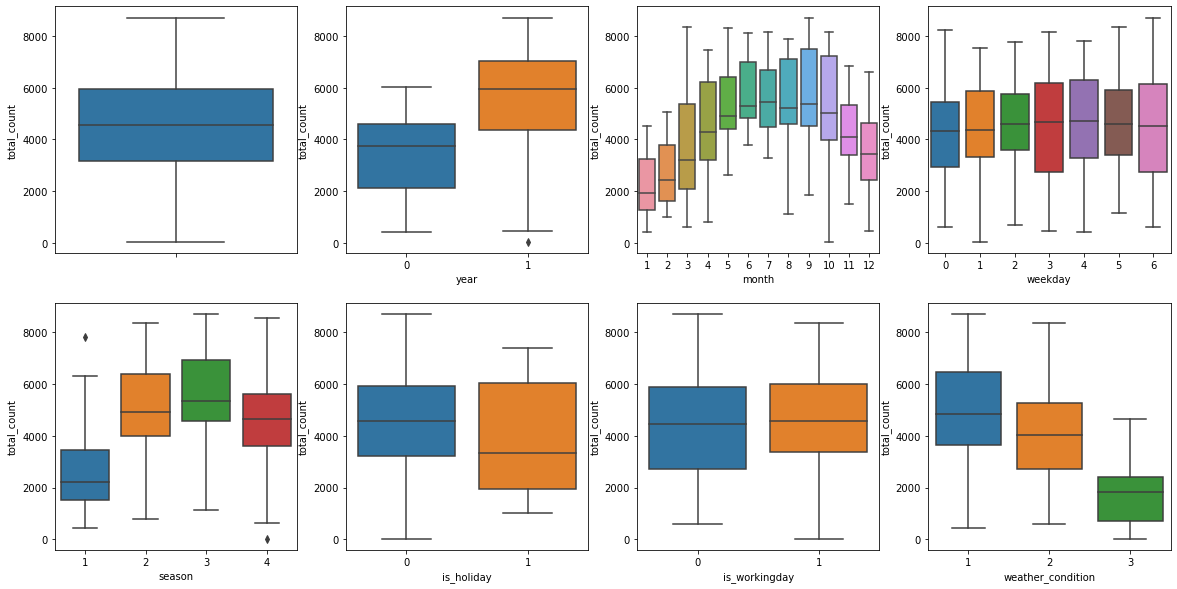

In [521]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20, 10)

sns.boxplot(data=data, y='total_count', ax=ax1)
sns.boxplot(data=data, x='year', y='total_count', ax=ax2)
sns.boxplot(data=data, x='month', y='total_count', ax=ax3)
sns.boxplot(data=data, x='weekday', y='total_count', ax=ax4)
sns.boxplot(data=data, x='season', y='total_count', ax=ax5)
sns.boxplot(data=data, x='is_holiday', y='total_count', ax=ax6)
sns.boxplot(data=data, x='is_workingday', y='total_count', ax=ax7)
sns.boxplot(data=data, x='weather_condition', y='total_count', ax=ax8)


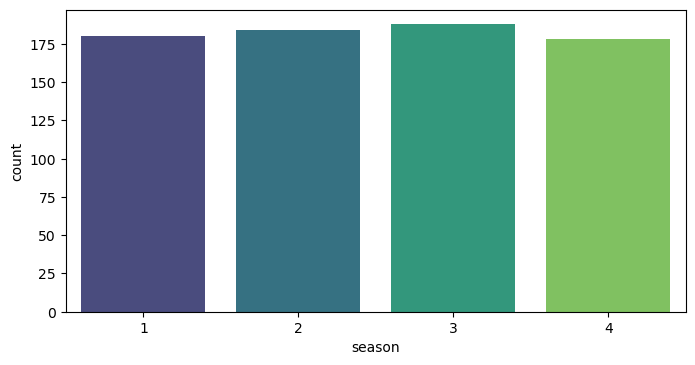

In [522]:
# no. of bikes accoding to season column
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(x='season',data=data,palette='viridis')

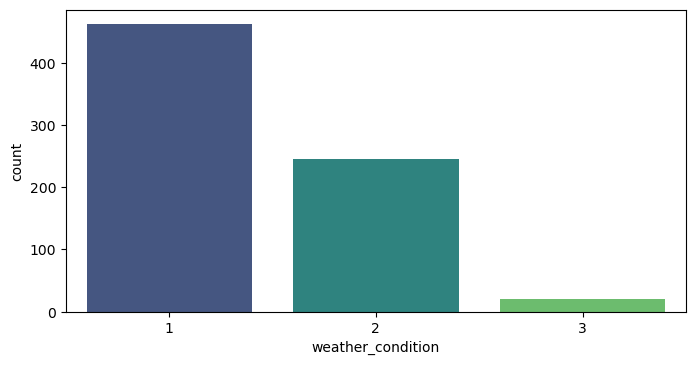

In [523]:
#no 0f bikes according to weather codition
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(x='weather_condition',data=data,palette='viridis')

The count decreases when the weather condition deteroriates to cloudy to rainy 

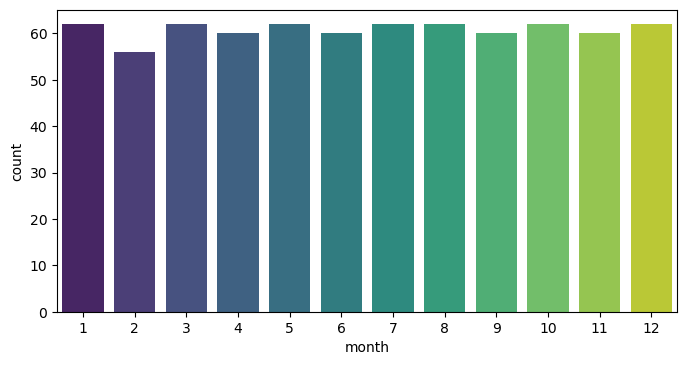

In [524]:
#no 0f bikes according to weather code
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(x='month',data=data,palette='viridis')

In [525]:
data.columns

Index(['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday',
       'weather_condition', 'atemp', 'humidity', 'windspeed', 'total_count'],
      dtype='object')

In [526]:
data_dummified = data.copy()

In [527]:
data_dummified['month'] = data_dummified['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

data_dummified['weather_condition'] = data_dummified['weather_condition'].map({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"})

data_dummified['season'] = data_dummified['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

dmap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}
data_dummified['weekday'].astype('object')
data_dummified['weekday'] = data_dummified['weekday'].map(dmap)


data_dummified.head()

,season,year,month,is_holiday,weekday,is_workingday,weather_condition,atemp,humidity,windspeed,total_count
0,spring,0,Jan,0,Sat,0,Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [528]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
data_dummified = pd.get_dummies(data_dummified, columns = ['weather_condition', 'season', 'weekday','month'],drop_first = True)

In [529]:
data_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          730 non-null    int64  
 1   is_holiday                    730 non-null    int64  
 2   is_workingday                 730 non-null    int64  
 3   atemp                         730 non-null    float64
 4   humidity                      730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   total_count                   730 non-null    int64  
 7   weather_condition_Cloudy      730 non-null    uint8  
 8   weather_condition_Light Rain  730 non-null    uint8  
 9   season_spring                 730 non-null    uint8  
 10  season_summer                 730 non-null    uint8  
 11  season_winter                 730 non-null    uint8  
 12  weekday_Mon                   730 non-null    uint8  
 13  weekd

Checking the correlation between the important continusous variables

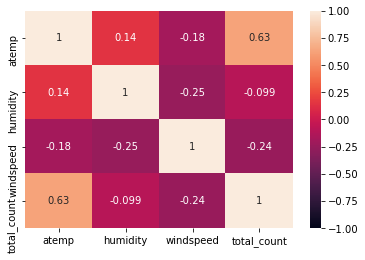

In [530]:
corr = data_dummified[['atemp', 'humidity', 'windspeed', 'total_count']].corr()
sns.heatmap(data=corr,
           vmax=1.0,
           vmin=-1.0,
           annot=True)

Splitting and Scaling the dataset

In [531]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
y = data_dummified.pop('total_count')
X= data_dummified
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [532]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 28)
(510,)
(219, 28)
(219,)


In [533]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [534]:
scale_vars = ['atemp', 'humidity', 'windspeed']

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test = scaler.transform(X_test[scale_vars])
X_train.head()

,year,is_holiday,is_workingday,atemp,humidity,windspeed,weather_condition_Cloudy,weather_condition_Light Rain,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [535]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Fidning top 15 variable using RFE technique

In [536]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [537]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('is_holiday', True, 1),
 ('is_workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('weather_condition_Cloudy', True, 1),
 ('weather_condition_Light Rain', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 13),
 ('month_Aug', False, 7),
 ('month_Dec', False, 2),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 10),
 ('month_Mar', False, 14),
 ('month_May', False, 5),
 ('month_Nov', False, 3),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1)]

In [538]:
selected_features = X_train.columns[rfe.support_]
len(selected_features)

15

In [539]:
selected_features

Index(['year', 'is_holiday', 'is_workingday', 'atemp', 'humidity', 'windspeed',
       'weather_condition_Cloudy', 'weather_condition_Light Rain',
       'season_spring', 'season_winter', 'weekday_Sat', 'weekday_Sun',
       'month_Jan', 'month_Jul', 'month_Sep'],
      dtype='object')

In [540]:
X_train_rfe = X_train[selected_features]

In [541]:
import statsmodels.api as sm

In [542]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [543]:
model1 = sm.OLS(y_train, X_train_rfe).fit()

In [544]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.66e-188
Time:                        15:08:34   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

We see that is_holiday has very high p-value, which indicates that is not significant, hence removing it from the train set.
And then we build the model2 again.

In [545]:
X_train_2 = X_train_rfe.drop('is_holiday', axis=1)
model2 = sm.OLS(y_train,  X_train_2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.66e-188
Time:                        15:08:35   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Now we check the VIF of the reamining variabale

In [546]:
X_train_2.columns

Index(['const', 'year', 'is_workingday', 'atemp', 'humidity', 'windspeed',
       'weather_condition_Cloudy', 'weather_condition_Light Rain',
       'season_spring', 'season_winter', 'weekday_Sat', 'weekday_Sun',
       'month_Jan', 'month_Jul', 'month_Sep'],
      dtype='object')

In [547]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop('const', axis=1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,humidity,29.98
2,atemp,18.21
1,is_workingday,17.13
9,weekday_Sat,4.62
4,windspeed,4.51
10,weekday_Sun,4.49
7,season_spring,3.05
5,weather_condition_Cloudy,2.28
8,season_winter,2.11
0,year,2.08


The VIF of humudity is very high, it means the humidity can be explained using other variables. Its ovious because humidity is dependent upon the wather condition and the season

In [548]:
X_train_3 = X_train_2.drop('humidity', axis=1)
model3 = sm.OLS(y_train,  X_train_3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.51e-186
Time:                        15:08:35   Log-Likelihood:                -4122.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [549]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop('const', axis=1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,is_workingday,13.71
2,atemp,12.74
3,windspeed,4.50
8,weekday_Sat,3.90
9,weekday_Sun,3.66
6,season_spring,2.81
0,year,2.07
7,season_winter,1.75
10,month_Jan,1.65
4,weather_condition_Cloudy,1.58


    In this next try, I will drop `is_workingday` becuase of its high VIF, from the model 

In [550]:
X_train_4 = X_train_3.drop('is_workingday', axis=1)
model4 = sm.OLS(y_train,  X_train_4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.35e-184
Time:                        15:08:36   Log-Likelihood:                -4130.3
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Here we have altmost same Rsquare and adjusted Rsquare, so this means there are no extra variables included in the model

In [551]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop('const', axis=1)
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,atemp,4.66
2,windspeed,3.95
5,season_spring,2.25
0,year,2.06
9,month_Jan,1.60
3,weather_condition_Cloudy,1.53
6,season_winter,1.41
10,month_Jul,1.35
7,weekday_Sat,1.22
8,weekday_Sun,1.21


In [552]:
y_train_pred = model4.predict(X_train_4)

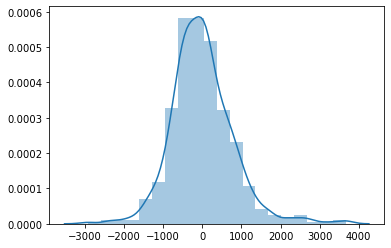

In [553]:
fig=plt.figure()
sns.distplot(y_train_pred-y_train, bins=20)

So the error terms the normally distributed, which validates one of the assumptions of Linear Regression

In [554]:
X_train_4.shape

(510, 13)

In [555]:
X_train_4.columns

Index(['const', 'year', 'atemp', 'windspeed', 'weather_condition_Cloudy',
       'weather_condition_Light Rain', 'season_spring', 'season_winter',
       'weekday_Sat', 'weekday_Sun', 'month_Jan', 'month_Jul', 'month_Sep'],
      dtype='object')

Cheking the pattern of predicted and actual test values.

Text(0, 0.5, 'y_pred')

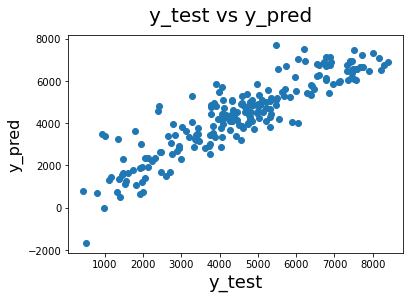

In [556]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

So we see that the predicted and the actual values have a constant variance.


Calculating the final r-squared score using the sklearn metrics

In [557]:
from sklearn.metrics import r2_score

In [558]:
r2_score(y_test, y_pred)

0.7964322728522617

SO we see that the Rsquare value of train data was 83.3% and for the test set it is 79.6 %

The top most important features using this model are:
    atemp, windspeed, season , weather condition, day of the week 